In [1]:
from route_66.visualisation import plot_simulation
from route_66.batch_run import plot_batch

import pandas as pd

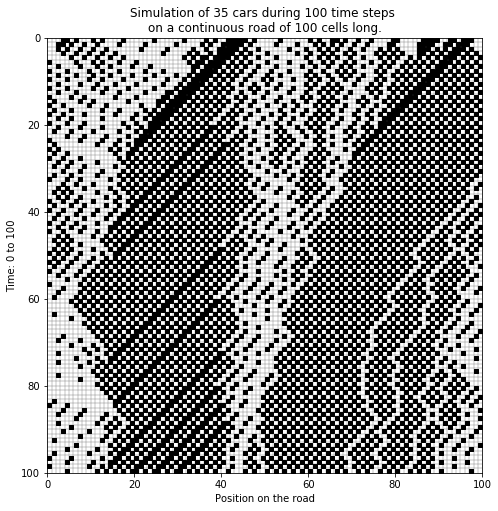

In [2]:
plot_simulation(100, 35, length=100, p=0.3, grid=True)

## Analysis
### Plot
Plot containing boxplots visualising the effects of timer length and initial number of cars on average velocity:

300it [00:12, 23.82it/s]


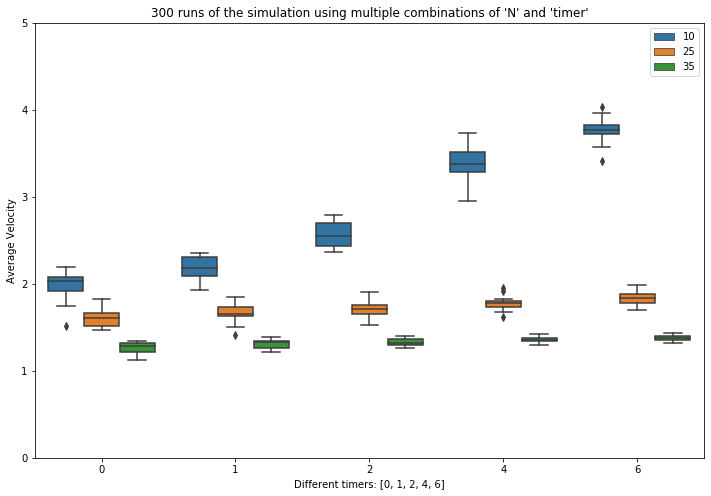

In [3]:
data = plot_batch(N=[10, 25, 35], timer=[0, 1, 2, 4, 6], iterations=20)

### Using Pandas


In [4]:
# Drop Run, length and lanes, and group Dataframe by initial cars on road 
N_data = data.drop(["Run", "length", "lanes"], axis=1).groupby("N")

# For each group, split from dataframe, group by timer, find mean for velocity and STD, sort by Average velocity
timer_data = [N_data.get_group(x).groupby("timer").mean().sort_values("Average Velocity", ascending=False) for x in N_data.groups]

In [5]:
mean_data = pd.concat(timer_data)
mean_data

,N,Average Velocity,Standard Deviation
timer,,,
6,10,3.761637,1.360880
4,10,3.381388,1.531003
2,10,2.560031,1.707309
1,10,2.188372,1.664626
0,10,1.979864,1.588752
6,25,1.829442,1.226635
4,25,1.775755,1.229477
2,25,1.707842,1.237267
1,25,1.671297,1.229606


For each variation of N, the timer with a length of 6 grants the greatest average average velocity. It usually also grants a lower or the lowest average standard deviation for its N.   

The greater the amount of initial cars, the lesser the impact of timer length. 